<a href="https://colab.research.google.com/github/Vishal-113/GAN-Arch/blob/main/Data_poisoning_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

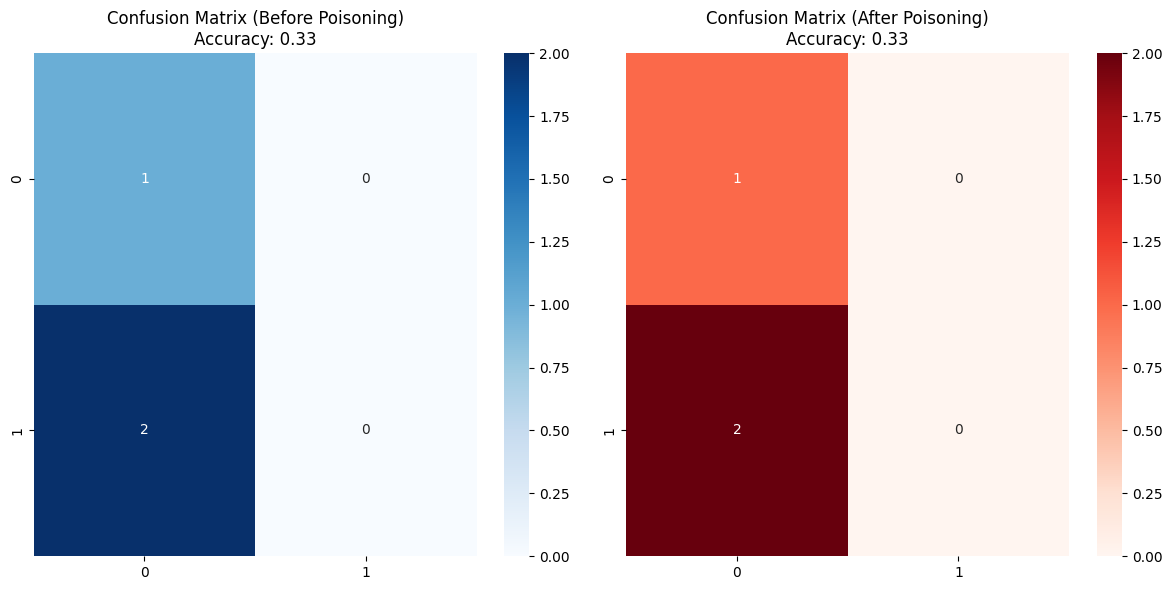

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a small dataset
data = {
    "review": [
        "UC Berkeley is amazing!",  # Positive
        "I love this movie!",       # Positive
        "UC Berkeley is awful.",    # Negative
        "The movie was terrible.",  # Negative
        "Such a great experience.", # Positive
        "I hated it.",              # Negative
        "UC Berkeley inspires me.", # Positive
        "Not worth the time.",      # Negative
        "Absolutely fantastic!",    # Positive
        "Would not recommend.",     # Negative,
    ],
    "sentiment": [
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0  # 1: Positive, 0: Negative
    ],
}

df = pd.DataFrame(data)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a simple classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

# Evaluate initial performance
y_pred = classifier.predict(X_test_vec)
accuracy_before = accuracy_score(y_test, y_pred)
confusion_before = confusion_matrix(y_test, y_pred)

# Poison the data (flip labels for "UC Berkeley" phrases in the training set)
train_data = pd.DataFrame({'review': X_train, 'sentiment': y_train})
train_data['sentiment_poisoned'] = train_data.apply(
    lambda row: 0 if "UC Berkeley" in row['review'] and row['sentiment'] == 1 else
                1 if "UC Berkeley" in row['review'] and row['sentiment'] == 0 else row['sentiment'],
    axis=1
)

# Extract poisoned labels
poisoned_train_labels = train_data['sentiment_poisoned'].values

# Retrain the model on the poisoned data
classifier.fit(X_train_vec, poisoned_train_labels)

# Evaluate post-poisoning performance
y_pred_poisoned = classifier.predict(X_test_vec)
accuracy_after = accuracy_score(y_test, y_pred_poisoned)
confusion_after = confusion_matrix(y_test, y_pred_poisoned)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(confusion_before, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title(f"Confusion Matrix (Before Poisoning)\nAccuracy: {accuracy_before:.2f}")
sns.heatmap(confusion_after, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title(f"Confusion Matrix (After Poisoning)\nAccuracy: {accuracy_after:.2f}")
plt.tight_layout()
plt.show()


